In [1]:
import torch
from torch.autograd import Function
from torch.autograd import gradcheck
import matplotlib.pyplot as plt

QUELQUES TESTS

In [2]:
a = torch.randn(1,5,requires_grad=True,dtype=torch.float64)
b = torch.randn(1,5,requires_grad = True,dtype=torch.float64)
c = a.mm(b.t())
d = 2*c
# print(a,b,c)
c.retain_grad()
d.retain_grad()
d.backward()
eta = 1
with torch.no_grad():
    a -= eta*a.grad
    b -= eta*b.grad
#     a.grad.zero_()
#     b.grad.zero_()
# print(c,tmp)
# print(tmp*2)
print("a : {}\n b : {}\n c : {}\n d : {}\n".format(a,b,c,d))
print(a.grad)
print(b.grad)
print(c.grad)
print(d.grad)
print(a)

a : tensor([[ 2.0686, -1.0811,  5.0914,  4.0886,  2.8676]], dtype=torch.float64,
       requires_grad=True)
 b : tensor([[-1.3975,  0.4544, -2.9879, -1.8328, -2.9490]], dtype=torch.float64,
       requires_grad=True)
 c : tensor([[-1.5354]], dtype=torch.float64, grad_fn=<MmBackward>)
 d : tensor([[-3.0708]], dtype=torch.float64, grad_fn=<MulBackward0>)

tensor([[-1.8265,  1.1385, -4.7966, -4.2296, -1.8574]], dtype=torch.float64)
tensor([[ 0.4842,  0.1149,  0.5896, -0.2820,  2.0203]], dtype=torch.float64)
tensor([[2.]], dtype=torch.float64)
tensor([[1.]], dtype=torch.float64)
tensor([[ 2.0686, -1.0811,  5.0914,  4.0886,  2.8676]], dtype=torch.float64,
       requires_grad=True)


Regression linéaire en TME1

PARTIE Module et optimiseur

Module spécifique

In [3]:
class twoLayers(torch.nn.Module):
    def __init__(self,d,h,c):
        super(twoLayers,self).__init__()
        self.linear1 = torch.nn.Linear(d,h)
        self.linear2 = torch.nn.Linear(h,c)
        self.Tanh = torch.nn.Tanh()
    def forward(self,x):
        return self.linear2(self.Tanh(self.linear1(x)))

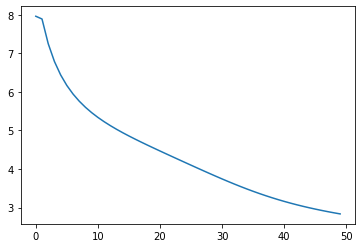

In [4]:
#data
n,d,h,c = 10,5,3,1
x = torch.randn(n,d,dtype=torch.float32)
y = torch.randn(n,c,dtype=torch.float32)
list_loss = []

#parameters
eps = 1e-3
nb_epoch = 500
batch_size = 10

#Model
model = twoLayers(d,h,c)
optim = torch.optim.SGD(params=model.parameters(),lr=eps)
loss_fn = torch.nn.MSELoss(reduction='sum')

#descent
for i in range(nb_epoch):
    yhat = model(x)
    loss = loss_fn(y,yhat)
    loss.backward()
    if(i%batch_size==0):
        list_loss.append(loss.item())
        optim.step()
        optim.zero_grad()
        
#show
plt.plot(list(range(len(list_loss))),list_loss)
plt.show()

Avec torch.nn.sequential

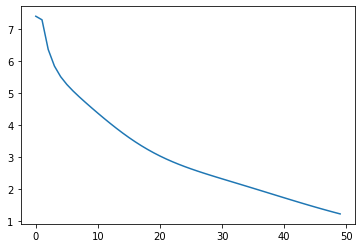

In [5]:
#data
n,d,h,c = 10,5,3,1
x = torch.randn(n,d,dtype=torch.float32)
y = torch.randn(n,c,dtype=torch.float32)

#parameters
list_loss = []
eps = 1e-3
nb_epoch = 500
batch_size = 10

#model
model = torch.nn.Sequential(torch.nn.Linear(d,h),
                        torch.nn.Tanh(),
                        torch.nn.Linear(h,c))
loss_fn = torch.nn.MSELoss(reduction='sum')
optim = torch.optim.SGD(params=model.parameters(),lr=eps)

#descent
for i in range(nb_epoch):
    yhat = model(x)
    loss = loss_fn(yhat,y)
    loss.backward()
    if i%batch_size == 0:
        list_loss.append(loss.item())
        optim.step()
        optim.zero_grad()

#show
plt.plot(list(range(len(list_loss))),list_loss)
plt.show()